<a href="https://colab.research.google.com/github/MNoufl/TEKO_TEST_Mohammad/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to build a neural networl model that aims to denoise sin signals.


1.   Dataset: contains sin signals that their frequencies ∈ {4,20,100,200,500} Hz
2.   Output: a trained model that can denoise signals.

Baseline of the works:


1.   Build a dataset of sin signals, then add noise to them.
2.   Define and train the model.
3.   Some examples of the output.





In [209]:
import numpy as np;
import matplotlib.pyplot as plt

Fs=1000;
Ts=1/Fs;
f=1;
t=np.arange(0,1,Ts)

def create_sin(f=2,phi=45):
  return np.sin(2*np.pi*f*t+phi);

def create_noise():
  return 0.5*np.random.normal(mean,std,size=t.shape[0])

t.shape

(1000,)

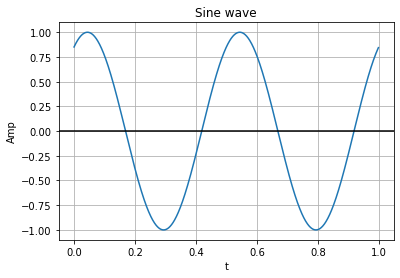

In [210]:
sig=create_sin();

plt.plot(t,sig)
plt.grid(True,which='both')
plt.ylabel("Amp")
plt.xlabel("t")
plt.title("Sine wave")
plt.axhline(y=0, color='k')

Text(0.5, 1.0, 'Noise')

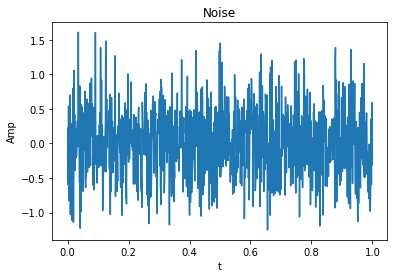

In [211]:
mean=0;
std=1;
noise=create_noise()

plt.plot(t,noise);
plt.ylabel("Amp");
plt.xlabel("t");
plt.title("Noise")

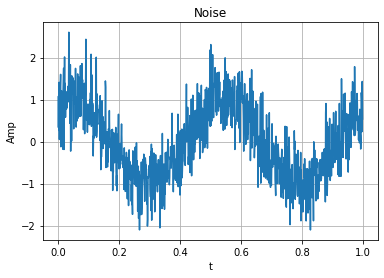

In [212]:
plt.plot(t,sig+noise);
plt.ylabel("Amp");
plt.xlabel("t");
plt.title("Noise")
plt.grid(True,which="both")

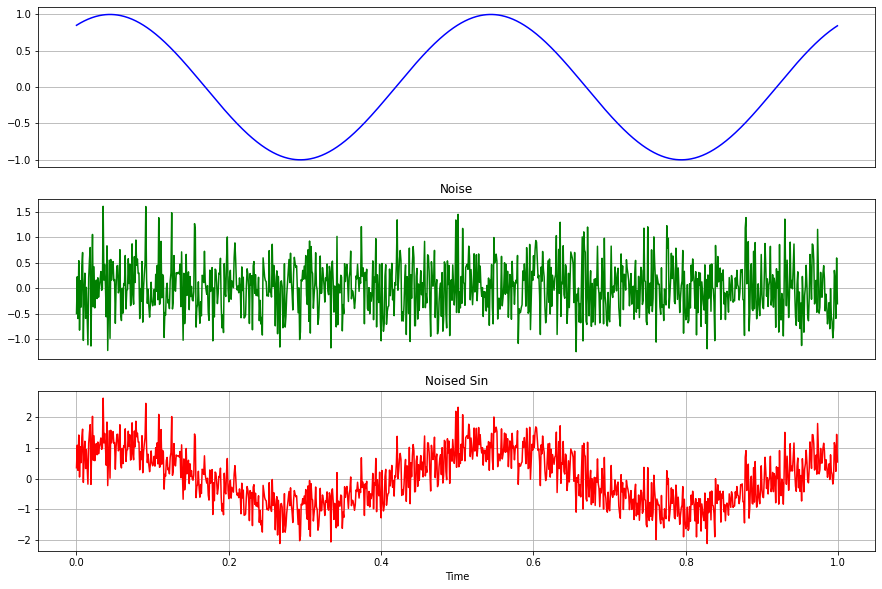

In [213]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(3,1,figsize=(15,10));
ax[0].plot(t,sig,label="Sin Wave",color='b'); ax[1].set_title("Noise"); ax[0].get_xaxis().set_ticks([])
ax[1].plot(t,noise,color='g'); ax[1].set_title("Noise");ax[1].get_xaxis().set_ticks([])
ax[2].plot(t,sig+noise,color='r'); ax[2].set_title("Noised Sin");ax[2].set_xlabel("Time")

ax[0].grid(True,which='both')
ax[1].grid(True,which='both')
ax[2].grid(True,which='both')


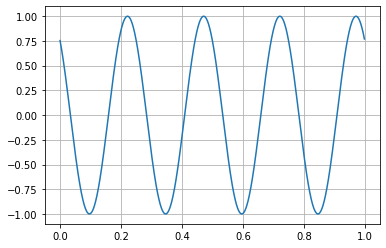

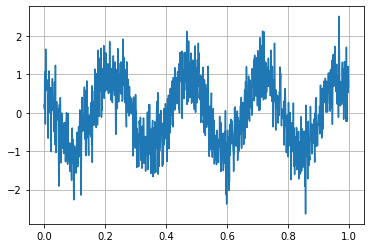

In [214]:
import random

N=1000;

clean_sigs=[];
freqs=[4,20,100,200,500]

for i in range(N):
  phi = random.random()*2*np.pi;
  freq=freqs[i%(len(freqs))]
  sig=create_sin(freq,phi)
  clean_sigs.append(sig)

clean_sigs=np.array(clean_sigs)

noise_sigs=[];

for i in range(N):

  ns=create_noise();
  noise_sigs.append(clean_sigs[i]+ns)

noise_sigs=np.array(noise_sigs)

plt.plot(t,clean_sigs[0]);plt.grid(True,which='both');plt.show()
plt.plot(t,noise_sigs[0]);plt.grid(True,which='both')

In [215]:
from tensorflow import keras;
from keras import Sequential,Model;
from keras.layers import Dense,Input
from keras import metrics

input_sig=Input(shape=(clean_sigs[0].shape[0]))


x=Dense(250,activation='tanh')(input_sig)
x=Dense(125,activation='tanh')(x)

x=Dense(50,activation='tanh')(x)

x=Dense(125,activation='tanh')(x)
x=Dense(250,activation='tanh')(x)

output_sig=Dense(1000,activation='tanh')(x)

model=Model(input_sig,output_sig)

model.compile(optimizer='adam',loss='mse')
model.summary()

model.fit(x=clean_sigs,y=clean_sigs,epochs=300,validation_split=0.1,batch_size=25,shuffle=True)

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_200 (Dense)           (None, 250)               250250    
                                                                 
 dense_201 (Dense)           (None, 125)               31375     
                                                                 
 dense_202 (Dense)           (None, 50)                6300      
                                                                 
 dense_203 (Dense)           (None, 125)               6375      
                                                                 
 dense_204 (Dense)           (None, 250)               31500     
                                                                 
 dense_205 (Dense)           (None, 1000)              251

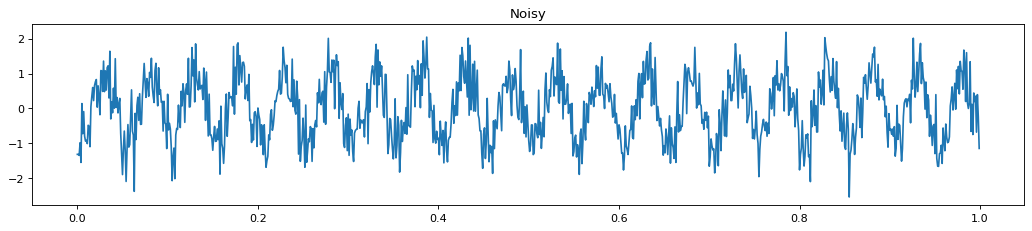

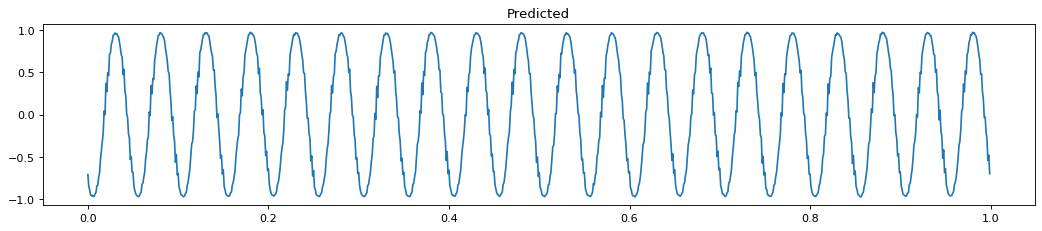

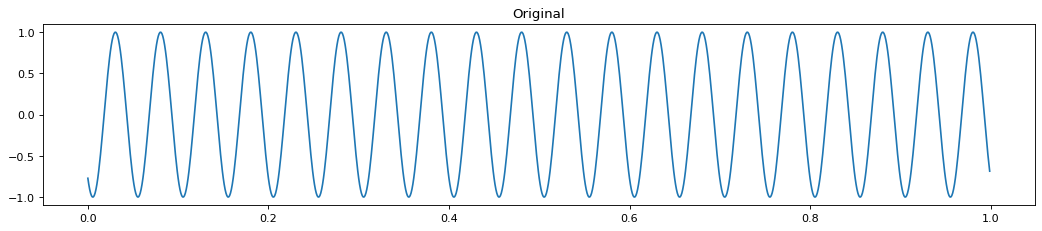

In [219]:
v=1;
sz=1000;
test_0=noise_sigs[v];
pred=model.predict(test_0.reshape(1,sz))

from matplotlib.pyplot import figure


figure(figsize=(16, 3), dpi=80);plt.plot(t,test_0.reshape(sz,1));plt.title("Noisy");plt.show()
figure(figsize=(16, 3), dpi=80);plt.plot(t,pred.reshape(sz,1));plt.title("Predicted");plt.show()
figure(figsize=(16, 3), dpi=80);plt.plot(t,clean_sigs[v].reshape(sz,1));plt.title("Original");plt.show()
